In [60]:
import pandas as pd
import matplotlib.pyplot as plt

### Features analysis

In [61]:
df = pd.read_csv('data/heart.csv',delimiter=';')
df['oldpeak'] = df['oldpeak'].str.replace(',','.')
df = df.astype(float)

In [62]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,"target,"
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,54.237154,131.893281,247.849802,149.932806,1.041107,0.545455
std,8.872503,18.042291,52.621375,23.135544,1.185348,0.498917
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,136.000000,0.000000,0.000000
50%,55.000000,130.000000,243.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


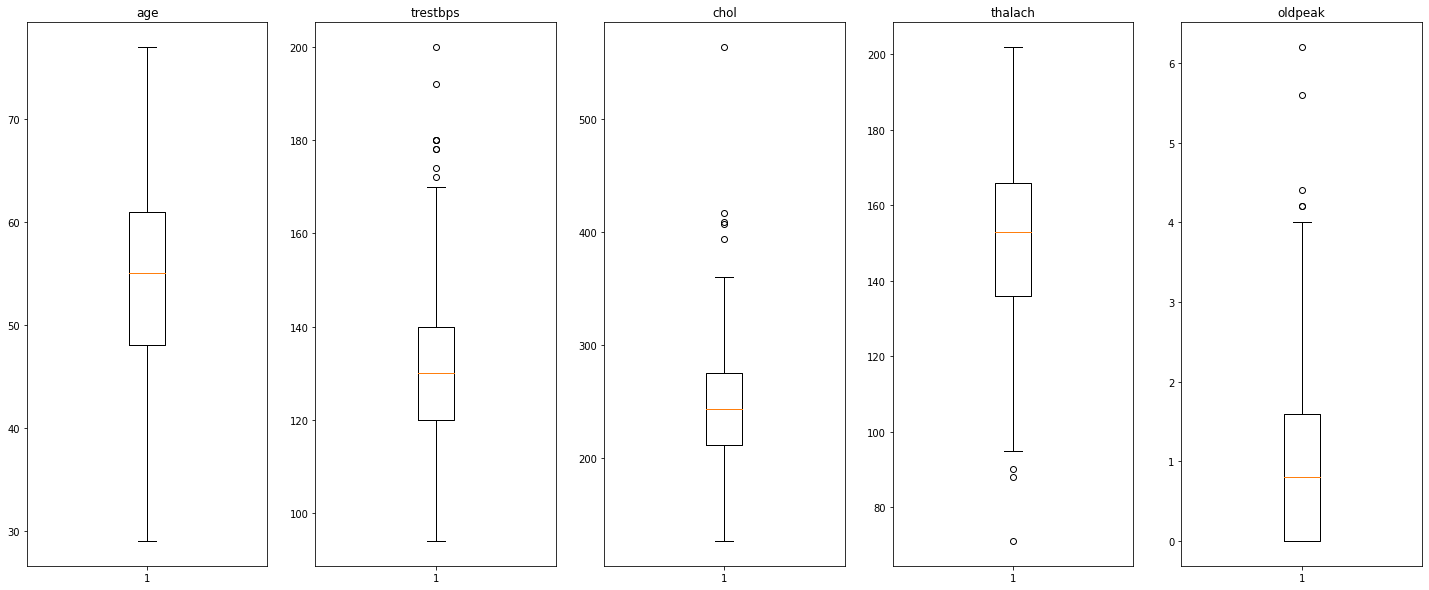

In [63]:
figure, ax = plt.subplots(1, 5, figsize=(25, 10))
for i in range(df.shape[1]-1):
    ax[i].boxplot(df.iloc[:, i])
    ax[i].set_title(df.columns.tolist()[i])

As we can see, there are some outliers in every feature, except age

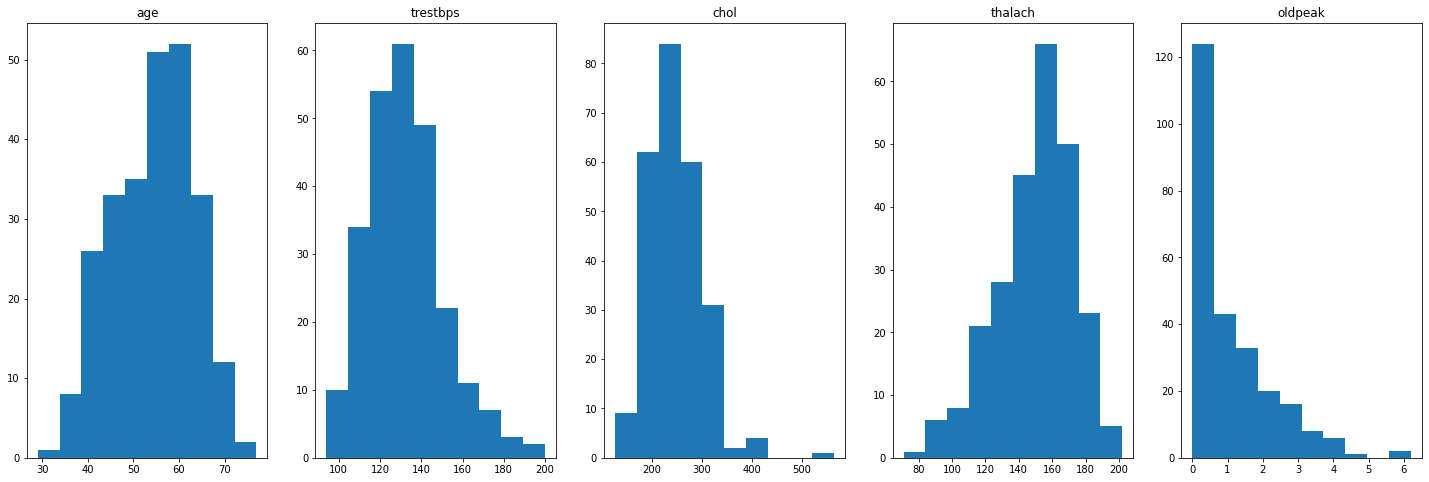

In [64]:
figure, ax = plt.subplots(1, 5, figsize=(25, 8))
for i in range(df.shape[1]-1):
    ax[i].hist(df.iloc[:, i])
    ax[i].set_title(df.columns.tolist()[i])

### Target analysis

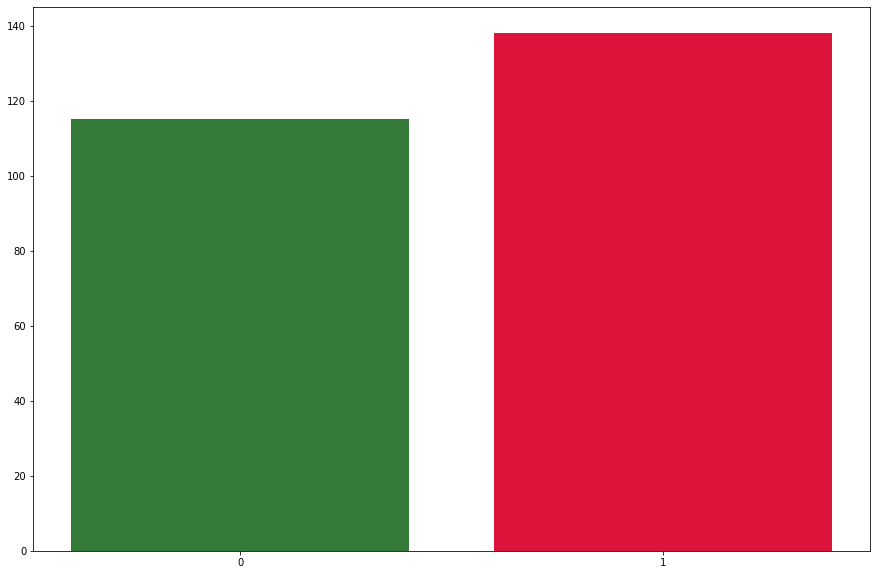

In [65]:
plt.subplots(figsize=(15, 10))
plt.bar(["0", "1"], df['target,'].value_counts().sort_index().tolist(), color=["#357A38", "#DC143C"])
plt.show()

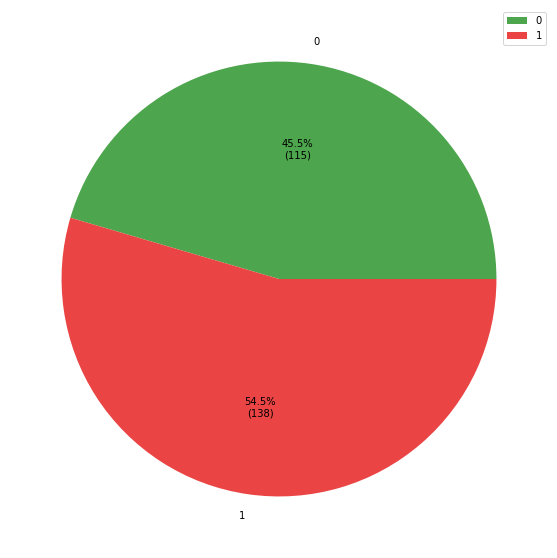

In [66]:
def percents(pct):
    absolute = int(pct / 100.*df.shape[0])
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.subplots(figsize=(10, 10))
plt.pie(df['target,'].value_counts().sort_index().tolist(), autopct= lambda p: percents(p), labels=["0", "1"], colors=["#4da64d", "#ea4444"])
plt.legend()
plt.show()

### Corelations with target

In [67]:
df.corr()['target,']

age        -0.242693
trestbps   -0.172047
chol       -0.050374
thalach     0.446332
oldpeak    -0.405775
target,     1.000000
Name: target,, dtype: float64